In [2]:
import numpy as np
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [100]:

results_folders = ["../WedFeb24044951PMEST2021/"]
results_folders.append("../ThuFeb25041902AMEST2021/")
results_folders.append("../ThuFeb25013750PMEST2021/")
# results_folders.append('../WedFeb24091056AMEST2021/')
# results_folders.append('../WedFeb24054736AMEST2021/')
# results_folders.append('../TueFeb23114410AMEST2021/')

headers = []

for results_folder in  results_folders:
    for file in os.listdir(results_folder):
        if 'header' in file: 
            headers.append(results_folder + file)
            print(results_folder + file)

../WedFeb24044951PMEST2021/2021-02-24T16:50:01.474_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:01.608_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:02.547_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:00.129_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:01.186_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:03.181_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:00_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:49:59.779_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:02.63_header.txt
../WedFeb24044951PMEST2021/2021-02-24T16:50:01.485_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:14.422_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:10.989_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:14.459_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:11.604_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:14.642_header.txt
../ThuFeb25041902AMEST2021/2021-02-25T04:19:10.774_header.txt
../ThuFeb2504

In [101]:
Q = {}
M = {}
for fname in headers:
    openfile = fname
    f = open(openfile, "r")
    N=0
    I=0
    D=0
    c = False
    Lambda = False
    run_type = ''
    reading = True
    
    while(reading):
        line = f.readline()
        
        if not line:
            reading = False
        if 'Q' in line.strip():
            run_type = 'Q'
        if 'M' in line.strip():
            run_type = 'M'
        if 'N' in line.strip():
            try: N = int(line.strip()[-4:])
            except: N = int(line.strip()[-2:])
        if 'Iterations' in line.strip():
            try: I = int(line.strip()[-4:])
            except: 
                I = int(line.strip()[-2:])
        if 'Depth' in line.strip():
            try: D = int(line.strip()[-3:])    
            except: 
                try: D = int(line.strip()[-1:])    
                except: D = False
        if 'Lambda:' in line.strip():
            
            try: 
                Lambda = float(line.strip()[7:])
            except: 
                Lambda = False
        if 'c:' in line.strip():
            try: c = float(line.strip()[3:])
            except: c = False
        ident = (N, I, D, run_type, Lambda, c)
        fheader = fname[:-10]
    try:
        df = pd.read_csv(fheader + "data.csv")
        df['3'] = df.apply(lambda x: min(1, x['1'] + x['2']), axis=1)
        if type == 'Q':
            if ident in Q:
                Q[ident] = Q[ident].append(df, ignore_index=True)
            else:
                Q[ident] = df
        if run_type == 'M':
            if ident in M:
                M[ident] = M[ident].append(df, ignore_index=True)
            else:
                M[ident] = df
    except: print("File not found: " + fheader + "data.csv")
        



In [102]:
for q in Q:
    print(q, end=": ")
    print(len(Q[q]['3']), end=": ")
    print(np.mean(Q[q]['1']),end = ", ")
    print(np.mean(Q[q]['2']),end = ", ")
    print(np.mean(Q[q]['3']))

depth_series = [[],[]]
c_series = [[],[]]
lambda_series = [[],[]]
for m in M:
    print(m, end=": ")
    print(len(M[m]['3']), end=": ")
    print(np.mean(M[m]['1']),end = ", ")
    print(np.mean(M[m]['2']),end = ", ")
    print(np.mean(M[m]['3']),end = ", ")
    print(np.var(M[m]['3']))
    if m[5] == 10 and m[4] == 0.9:
        depth_series[0].append(m[2])
        depth_series[1].append(np.mean(M[m]['3']))
    if m[2] == 5 and m[4] == 0.9:
        c_series[0].append(m[5])
        c_series[1].append(np.mean(M[m]['3']))
    if m[5] == 10:
        lambda_series[0].append(m[4])
        lambda_series[1].append(np.mean(M[m]['3']))

(100, 200, 10, 'M', 0.5, 10.0): 9000: 0.008333333333333333, 0.099, 0.10466666666666667, 0.09371155555555874
(100, 200, 10, 'M', 0.7, 10.0): 9000: 0.0035555555555555557, 0.09233333333333334, 0.09488888888888888, 0.08588498765431953
(100, 200, 10, 'M', 0.8, 10.0): 9000: 0.0033333333333333335, 0.09577777777777778, 0.09766666666666667, 0.08812788888890755
(100, 200, 10, 'M', 0.4, 10.0): 9000: 0.010222222222222223, 0.10533333333333333, 0.113, 0.10023100000001751
(100, 200, 10, 'M', 0.925, 10.0): 6000: 0.0025, 0.08966666666666667, 0.09083333333333334, 0.08258263888888309
(100, 200, 10, 'M', 0.9, 10.0): 6000: 0.003, 0.10133333333333333, 0.10316666666666667, 0.09252330555556212
(100, 200, 10, 'M', 0.3, 10.0): 9000: 0.013555555555555555, 0.11244444444444444, 0.12266666666666666, 0.10761955555556373
(100, 200, 10, 'M', 0.95, 10.0): 9000: 0.0017777777777777779, 0.09777777777777778, 0.09855555555555555, 0.08884235802470228
(100, 200, 10, 'M', 0.975, 10.0): 9000: 0.0035555555555555557, 0.1023333333

In [ ]:
# df = pd.DataFrame(np.array(depth_series).T, columns=("depth","loss"))
# sns.scatterplot(data = df, x="depth", y="loss")
# plt.show()

In [ ]:
# df = pd.DataFrame(np.array(c_series).T, columns=("c","loss"))
# sns.scatterplot(data = df, x="c", y="loss")
# plt.show()

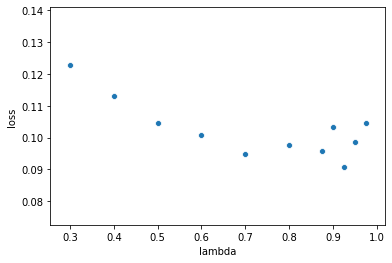

In [103]:
df = pd.DataFrame(np.array(lambda_series).T, columns=("lambda","loss"))
sns.scatterplot(data = df, x="lambda", y="loss")
plt.show()

In [50]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap


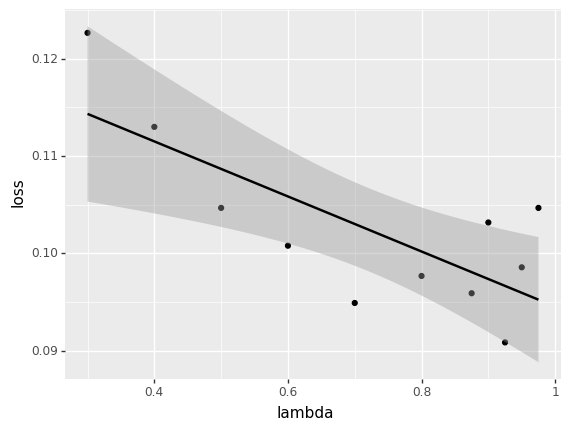

<ggplot: (8733415537801)>

In [104]:
(ggplot(df, aes('lambda', 'loss'))
+ geom_point()
+ stat_smooth(method='lm')
)